In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os



In [121]:
def auc(value_list, nr_samples_list=[], ignore_inf=True, ignore_nan=True):
    area = 0
    for i in range(len(value_list)-1):
        if len(nr_samples_list) == 0:
            if ignore_inf and (value_list[i] == np.inf or value_list[i+1] == np.inf):
                continue
            if ignore_nan and (np.isnan(value_list[i]) or np.isnan(value_list[i+1])):
                continue
            area += (value_list[i]+value_list[i+1])/2
        else:
            if ignore_inf and (value_list[i] == np.inf or value_list[i+1] == np.inf):
                continue
            if ignore_nan and (np.isnan(value_list[i]) or np.isnan(value_list[i+1])):
                continue
            area += (value_list[i]+value_list[i+1])/2 * (nr_samples_list[i+1]-nr_samples_list[i])
    return area

# data

## acc

In [122]:
cifar_fp_lwf_cnn = [79.5, 64.006, 50.75, 40.456, 33.922]
cifar_fp_icarl_nme = [79.17, 71.996, 64.768, 58.77, 52.842]
cifar_fp_icarl_cnn = [79.55, 70.256, 59.21, 50.766, 43.196]
cifar_fp_bic_nme = [79.13, 71.574, 64.314, 58.15, 53.078]
cifar_fp_bic_cnn = [79.72,  72.184,  64.712,  58.482,  48.538]

cifar_ours_lwf = [61.45, 50.452, 38.264, 28.83, 23.584]
cifar_ours_icarl_nme = [72.33, 65.864, 58.434, 52.488, 47.146]
cifar_ours_icarl_cnn = [72.77, 63.316, 52.298, 44.432, 37.248]
cifar_ours_bic_nme = [71.75, 65.13, 57.99, 52.38, 47.56]
cifar_ours_bic_cnn = [72.64, 65.43, 57.93, 51.71, 46.07]

cifar_fp = [cifar_fp_lwf_cnn, cifar_fp_icarl_nme, cifar_fp_icarl_cnn, cifar_fp_bic_nme, cifar_fp_bic_cnn]
cifar_ours = [cifar_ours_lwf, cifar_ours_icarl_nme, cifar_ours_icarl_cnn, cifar_ours_bic_nme, cifar_ours_bic_cnn]

In [123]:
dsads_fp_lwf_cnn =      [99.9165,  69.666,  46.4305,  30.5835,  23.232,  17.896,  16.363,  14.047,  12.811,  12.0565]
dsads_fp_icarl_nme =    [99.875,  97.625,  95.2765, 89.3865,  88.359,  85.194,  82.8105,  79.6875,  77.416,  76.3815]
dsads_fp_icarl_cnn =    [99.9165,  97.208,  92.1245,  85.5625,  84.433,  80.944,  78.566,  74.8805,  73.422,  72.8265]
dsads_fp_bic_nme =      [99.875, 97.417, 93.5285, 86.6775, 85.632, 81.0345, 78.071, 74.417, 72.4035, 70.583]
dsads_fp_bic_cnn =      [99.88,  97.08,  92.46,  86.84,  85.52,  80.96,  76.32,  73.46,  69.31,  67.55]

dsads_ours_lwf =        [99.875,  68.8545,  49.389,  33.458,  25.0075,  19.7095,  16.864,  15.089,  13.1435,  12.333]
dsads_ours_icarl_nme =  [99.7085,  96.3125,  93.9865,  88.3125,  87.2425,  83.854,  81.2145,  79.7455,  77.236,  77.192]
dsads_ours_icarl_cnn =  [99.875,  96.667,  92.167,  85.4165,  84.818,  79.513,  77.4935,  74.9115,  72.694,  72.7365]
dsads_ours_bic_nme =    [99.709, 93.666, 93.612, 82.71, 81.668, 77.168, 71.856, 66.604, 67.572, 65.348]
dsads_ours_bic_cnn =    [99.88, 96.40, 90.54, 84.64, 83.36, 78.37, 74.69, 69.92, 65.56, 63.79]

dsads_fp = [dsads_fp_lwf_cnn, dsads_fp_icarl_nme, dsads_fp_icarl_cnn, dsads_fp_bic_nme, dsads_fp_bic_cnn]
dsads_ours = [dsads_ours_lwf, dsads_ours_icarl_nme, dsads_ours_icarl_cnn, dsads_ours_bic_nme, dsads_ours_bic_cnn]

In [124]:
pamap_fp_lwf_cnn = [98.511,  69.985,  54.49,  44.3545,  40.023,  36.3395]
pamap_fp_icarl_nme = [98.607,  95.4885,  91.7805,  86.3215,  83.1715,  80.025]
pamap_fp_icarl_cnn = [98.511,  94.5975,  89.6315,  83.329,  79.2365,  77.518]
pamap_fp_bic_nme = [98.5635,  95.069,  90.7365,  84.0125,  80.0515,  76.894]
pamap_fp_bic_cnn = [98.3385,  94.8435,  90.2805,  83.753,  80.535,  77.04]

pamap_ours_lwf = [98.6035,  67.1725,  55.0345,  41.972,  35.699,  32.837]
pamap_ours_icarl_nme = [98.139,  94.671,  91.423,  85.2075,  82.8195,  79.9585]
pamap_ours_icarl_cnn = [98.6035,  94.5755,  89.0705,  81.9145,  80.0145, 77.8685]
pamap_ours_bic_nme = [97.9925,  94.208,  87.02,  79.172,  77.524,  74.866]
pamap_ours_bic_cnn = [98.56,  93.33,  88.69,  81.07,  78.21,  75.46]

pamap_fp = [pamap_fp_lwf_cnn, pamap_fp_icarl_nme, pamap_fp_icarl_cnn, pamap_fp_bic_nme, pamap_fp_bic_cnn]
pamap_ours = [pamap_ours_lwf, pamap_ours_icarl_nme, pamap_ours_icarl_cnn, pamap_ours_bic_nme, pamap_ours_bic_cnn]

In [125]:
hapt_fp_lwf_cnn = [97.2275,  71.447,  55.859,  44.904,  35.65,  32.778]
hapt_fp_icarl_nme = [97.2185,  96.368,  93.265,  90.511,  87.1235,  85.7985]
hapt_fp_icarl_cnn = [97.2275,  96.125,  91.382,  88.611,  83.343,  82.98]
hapt_fp_bic_nme = [97.377,  96.1765,  91.8405,  88.45,  84.2145,  81.5415]
hapt_fp_bic_cnn = [97.1345,  96.0145,  91.562,  88.6145,  84.241,  81.4195]

hapt_ours_lwf = [97.0125,  73.5865,  53.7675,  39.3525,  31.106,  28.6475]
hapt_ours_icarl_nme = [96.7705,  96.154,  90.63,  89.6645,  85.593,  84.944]
hapt_ours_icarl_cnn = [97.0125,  95.805,  88.458,  87.432,  82.344,  82.562]
hapt_ours_bic_nme = [96.699,  95.801,  88.275,  86.069,  81.1045,  78.488]
hapt_ours_bic_cnn = [96.8825,  95.7185,  88.532,  86.548,  81.706,  78.2635]

hapt_fp = [hapt_fp_lwf_cnn, hapt_fp_icarl_nme, hapt_fp_icarl_cnn, hapt_fp_bic_nme, hapt_fp_bic_cnn]
hapt_ours = [hapt_ours_lwf, hapt_ours_icarl_nme, hapt_ours_icarl_cnn, hapt_ours_bic_nme, hapt_ours_bic_cnn]

AUC

In [126]:
for i in [cifar_fp, cifar_ours, dsads_fp, dsads_ours, pamap_fp, pamap_ours, hapt_fp, hapt_ours]:
    for j in i:
        print(round(auc(j),2))
    print()

211.92
261.54
241.6
260.14
259.51

160.06
236.52
215.06
235.16
234.43

287.02
783.88
753.51
754.41
745.66

297.62
776.35
749.99
717.38
725.32

276.28
446.08
434.81
437.6
437.1

265.6
443.17
433.81
424.35
428.31

272.86
458.78
449.56
450.14
449.71

260.64
452.9
443.83
438.84
440.08



## Forgetting

In [127]:
cifar_fp_lwf_cnn_forgetting = [None, 13.58, 24.73333333, 33.72, 39.254]
cifar_fp_icarl_cnn_forgetting = [None, 9.8, 20.47333333, 28.6125, 36.098]
cifar_fp_bic_cnn_forgetting = [None, 10.405, 11.24, 11.97, 14.532]

cifar_ours_lwf_forgetting = [None, 7.665, 17.85666667, 26.3725, 31.058]
cifar_ours_icarl_cnn_forgetting = [None, 10.86, 21.98, 29.75, 36.93]
cifar_ours_bic_cnn_forgetting = [None, 6.28, 10.29, 14.01, 17.69]

cifar_fp_forgetting = [cifar_fp_lwf_cnn_forgetting, cifar_fp_icarl_cnn_forgetting, cifar_fp_bic_cnn_forgetting]
cifar_ours_forgetting = [cifar_ours_lwf_forgetting, cifar_ours_icarl_cnn_forgetting, cifar_ours_bic_cnn_forgetting]

dsads_fp_lwf_cnn_forgetting = [None, 22.90, 36.25, 42.27, 43.37, 42.81, 40.79, 38.85, 37.31, 35.46]
dsads_fp_icarl_cnn_forgetting = [None, 1.40, 6.37, 11.73, 13.08, 16.65, 19.21, 23.06, 24.18, 24.91]
dsads_fp_bic_cnn_forgetting = [None, 1.25, 5.08, 8.51, 9.43, 11.67, 14.25, 14.61, 13.99, 13.54]

dsads_ours_lwf_forgetting = [None, 20.73, 31.87, 39.46, 43.68, 44.71, 43.90, 41.94, 40.85, 38.98]
dsads_ours_icarl_cnn_forgetting = [None, 1.46, 6.31, 11.55, 12.48, 17.90, 20.08, 22.81, 24.67, 24.75]
dsads_ours_bic_cnn_forgetting = [None, 1.52, 7.19, 10.19, 11.18, 12.68, 13.63, 14.51, 15.14, 14.40]

dsads_fp_forgetting = [dsads_fp_lwf_cnn_forgetting, dsads_fp_icarl_cnn_forgetting, dsads_fp_bic_cnn_forgetting]
dsads_ours_forgetting = [dsads_ours_lwf_forgetting, dsads_ours_icarl_cnn_forgetting, dsads_ours_bic_cnn_forgetting]

pamap_fp_lwf_cnn_forgetting = [None, 19.394, 29.77053333, 35.42886607, 32.6735, 29.74942273]
pamap_fp_icarl_cnn_forgetting = [None, 3.474166667, 7.8309, 13.42209821, 16.70982778, 17.59054545]
pamap_fp_bic_cnn_forgetting = [None, 2.857333333, 5.678716667, 9.443366071, 11.45979444, 12.04762727]

pamap_ours_lwf_forgetting = [None, 17.54, 26.28, 34.15, 35.69, 32.38]
pamap_ours_icarl_cnn_forgetting = [None, 3.51, 8.46, 14.13, 15.89, 16.94]
pamap_ours_bic_cnn_forgetting = [None, 4.16, 7.49, 12.52, 13.99, 13.73]

pamap_fp_forgetting = [pamap_fp_lwf_cnn_forgetting, pamap_fp_icarl_cnn_forgetting, pamap_fp_bic_cnn_forgetting]
pamap_ours_forgetting = [pamap_ours_lwf_forgetting, pamap_ours_icarl_cnn_forgetting, pamap_ours_bic_cnn_forgetting]

hapt_fp_lwf_cnn_forgetting = [None, 25.663625, 33.29183333, 36.1449375, 39.76755, 36.226]
hapt_fp_icarl_cnn_forgetting = [None, 2.564, 7.188916667, 11.3368125, 15.57585, 17.66913636]
hapt_fp_bic_cnn_forgetting = [None, 2.556875, 5.738333333, 8.17325, 10.7909, 11.56572727]

hapt_ours_lwf_forgetting = [None, 23.80725, 34.13483333, 38.1169375, 40.4736, 37.48613636]
hapt_ours_icarl_cnn_forgetting = [None, 2.892, 9.2005, 11.577375, 16.0419, 17.52377273]
hapt_ours_bic_cnn_forgetting = [None, 2.72675, 8.662083333, 9.5529375, 11.85285, 13.10672727]

hapt_fp_forgetting = [hapt_fp_lwf_cnn_forgetting, hapt_fp_icarl_cnn_forgetting, hapt_fp_bic_cnn_forgetting]
hapt_ours_forgetting = [hapt_ours_lwf_forgetting, hapt_ours_icarl_cnn_forgetting, hapt_ours_bic_cnn_forgetting]

# params

In [147]:
figsize = (7.48, 5.6)
linewidth = 1.5
fontsize = 14

# Acc combined

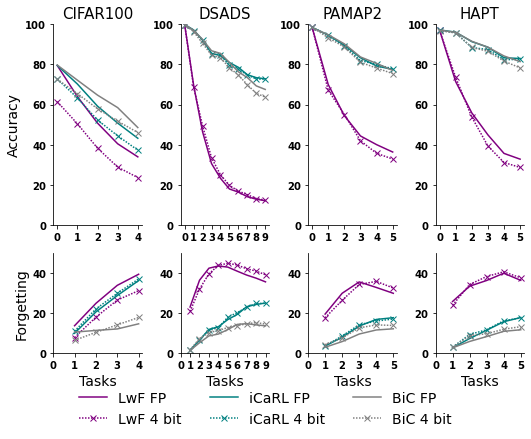

In [148]:

# with sns.axes_style('darkgrid'):
fig, axes = plt.subplots(2, 4, figsize=figsize, sharex=False, squeeze=True,
                         gridspec_kw={'height_ratios': [2/3, 1/3]})

colors = ["purple", "teal", "grey"]
axes[0,0].plot(np.arange(len(cifar_fp_lwf_cnn)), cifar_fp_lwf_cnn,
                label='LwF FP', color=colors[0], linewidth=linewidth)
axes[0,0].plot(np.arange(len(cifar_ours_lwf)), cifar_ours_lwf,
                label='LwF 4 bit', color=colors[0], marker='x', dashes=[1],
                linewidth=linewidth)
axes[0,0].plot(np.arange(len(cifar_fp_icarl_cnn)), cifar_fp_icarl_cnn,
                label='iCaRL FP', color=colors[1], linewidth=linewidth)
axes[0,0].plot(np.arange(len(cifar_ours_icarl_cnn)), cifar_ours_icarl_cnn,
                label='iCaRL 4 bit', color=colors[1], marker='x', dashes=[1],
                linewidth=linewidth)
axes[0,0].plot(np.arange(len(cifar_fp_bic_cnn)), cifar_fp_bic_cnn,
                label='BiC FP', color=colors[2], linewidth=linewidth)
axes[0,0].plot(np.arange(len(cifar_ours_bic_cnn)),cifar_ours_bic_cnn,
                label='BiC 4 bit', color=colors[2], marker='x', dashes=[1],
                linewidth=linewidth)
# axes[0,0].set_xlabel('Tasks', fontsize=fontsize)
axes[0,0].set_ylabel('Accuracy', fontsize=fontsize)
axes[0,0].set_title('CIFAR100', fontsize=fontsize+1)
axes[0,0].set_xticks(range(0, len(cifar_ours_bic_cnn)))

axes[0,1].plot(np.arange(len(dsads_fp_lwf_cnn)), dsads_fp_lwf_cnn,
                label='LwF FP', color=colors[0], linewidth=linewidth)
axes[0,1].plot(np.arange(len(dsads_ours_lwf)), dsads_ours_lwf,
                label='LwF 4 bit', color=colors[0], marker='x', dashes=[1],
                linewidth=linewidth)
axes[0,1].plot(np.arange(len(dsads_fp_icarl_cnn)), dsads_fp_icarl_cnn,
                label='iCaRL FP', color=colors[1], linewidth=linewidth)
axes[0,1].plot(np.arange(len(dsads_ours_icarl_cnn)), dsads_ours_icarl_cnn,
                label='iCaRL 4 bit', color=colors[1], marker='x', dashes=[1],
                linewidth=linewidth)
axes[0,1].plot(np.arange(len(dsads_fp_bic_cnn)), dsads_fp_bic_cnn,
                label='BiC FP', color=colors[2], linewidth=linewidth)
axes[0,1].plot(np.arange(len(dsads_ours_bic_cnn)), dsads_ours_bic_cnn,
                label='BiC 4 bit', color=colors[2], marker='x', dashes=[1],
                linewidth=linewidth)
# axes[0,1].set_xlabel('Tasks', fontsize=fontsize)
axes[0,1].set_title('DSADS', fontsize=fontsize+1)
axes[0,1].set_xticks(range(0, len(dsads_fp_bic_cnn)))
# axes[2].set_xticks(range(len(dsads_ours_bic_cnn)))

axes[0,2].plot(np.arange(len(pamap_ours_lwf)), pamap_ours_lwf,
                label='LwF 4 bit', color=colors[0], marker='x', dashes=[1],
                linewidth=linewidth)
axes[0,2].plot(np.arange(len(pamap_fp_lwf_cnn)), pamap_fp_lwf_cnn,
                label='LwF FP', color=colors[0], linewidth=linewidth)
axes[0,2].plot(np.arange(len(pamap_ours_icarl_cnn)), pamap_ours_icarl_cnn,
                label='iCaRL 4 bit', color=colors[1], marker='x', dashes=[1],
                linewidth=linewidth)
axes[0,2].plot(np.arange(len(pamap_fp_icarl_cnn)), pamap_fp_icarl_cnn,
                label='iCaRL FP', color=colors[1], linewidth=linewidth)
axes[0,2].plot(np.arange(len(pamap_ours_bic_cnn)), pamap_ours_bic_cnn,
                label='BiC 4 bit', color=colors[2], marker='x', dashes=[1],
                linewidth=linewidth)
axes[0,2].plot(np.arange(len(pamap_fp_bic_cnn)), pamap_fp_bic_cnn,
                label='BiC FP', color=colors[2], linewidth=linewidth)
# axes[0,2].set_xlabel('Tasks', fontsize=fontsize)
#axes[2].set_ylabel('Accuracy')
axes[0,2].set_title('PAMAP2', fontsize=fontsize+1)
# axes[2].set_xticks((0, 2, 4, 5))
axes[0,2].set_xticks(range(0, len(pamap_fp_bic_cnn)))


axes[0,3].plot(np.arange(len(hapt_ours_lwf)), hapt_ours_lwf,
                label='LwF 4 bit', color=colors[0], marker='x', dashes=[1],
                linewidth=linewidth)
axes[0,3].plot(np.arange(len(hapt_fp_lwf_cnn)), hapt_fp_lwf_cnn,
                label='LwF FP', color=colors[0], linewidth=linewidth)
axes[0,3].plot(np.arange(len(hapt_ours_icarl_cnn)), hapt_ours_icarl_cnn,
                label='iCaRL 4 bit', color=colors[1], marker='x', dashes=[1],
                linewidth=linewidth)
axes[0,3].plot(np.arange(len(hapt_fp_icarl_cnn)), hapt_fp_icarl_cnn,
                label='iCaRL FP', color=colors[1], linewidth=linewidth)
axes[0,3].plot(np.arange(len(hapt_ours_bic_cnn)), hapt_ours_bic_cnn,
                label='BiC 4 bit', color=colors[2], marker='x', dashes=[1],
                linewidth=linewidth)
axes[0,3].plot(np.arange(len(hapt_fp_bic_cnn)), hapt_fp_bic_cnn,
                label='BiC FP', color=colors[2], linewidth=linewidth)
# axes[0,3].set_xlabel('Tasks', fontsize=fontsize)
#axes[3].set_ylabel('Accuracy')
axes[0,3].set_title('HAPT', fontsize=fontsize+1)
# axes[3].set_xticks((0, 2, 4, 5))
axes[0,3].set_xticks(range(len(hapt_fp_bic_cnn)))



axes[1,0].plot(np.arange(len(cifar_fp_lwf_cnn_forgetting)), cifar_fp_lwf_cnn_forgetting,
                label='LwF FP', color=colors[0], linewidth=linewidth)
axes[1,0].plot(np.arange(len(cifar_ours_lwf_forgetting)), cifar_ours_lwf_forgetting,
                label='LwF 4 bit', color=colors[0], marker='x', dashes=[1],
                linewidth=linewidth)
axes[1,0].plot(np.arange(len(cifar_fp_icarl_cnn_forgetting)), cifar_fp_icarl_cnn_forgetting,
                label='iCaRL FP', color=colors[1], linewidth=linewidth)
axes[1,0].plot(np.arange(len(cifar_ours_icarl_cnn_forgetting)), cifar_ours_icarl_cnn_forgetting,
                label='iCaRL 4 bit', color=colors[1], marker='x', dashes=[1],
                linewidth=linewidth)
axes[1,0].plot(np.arange(len(cifar_fp_bic_cnn_forgetting)), cifar_fp_bic_cnn_forgetting,
                label='BiC FP', color=colors[2], linewidth=linewidth)
axes[1,0].plot(np.arange(len(cifar_ours_bic_cnn_forgetting)),cifar_ours_bic_cnn_forgetting,
                label='BiC 4 bit', color=colors[2], marker='x', dashes=[1],
                linewidth=linewidth)
axes[1,0].set_xlabel('Tasks', fontsize=fontsize)
axes[1,0].set_ylabel('Forgetting', fontsize=fontsize)
# axes[1,0].set_title('CIFAR100', fontsize=fontsize+1)
axes[1,0].set_xticks(range(len(cifar_ours_bic_cnn_forgetting)))
axes[1,0].set_yticks(range(0, 50, 20))

axes[1,1].plot(np.arange(len(dsads_fp_lwf_cnn_forgetting)), dsads_fp_lwf_cnn_forgetting,
                label='LwF FP', color=colors[0], linewidth=linewidth)
axes[1,1].plot(np.arange(len(dsads_ours_lwf_forgetting)), dsads_ours_lwf_forgetting,
                label='LwF 4 bit', color=colors[0], marker='x', dashes=[1],
                linewidth=linewidth)
axes[1,1].plot(np.arange(len(dsads_fp_icarl_cnn_forgetting)), dsads_fp_icarl_cnn_forgetting,
                label='iCaRL FP', color=colors[1], linewidth=linewidth)
axes[1,1].plot(np.arange(len(dsads_ours_icarl_cnn_forgetting)), dsads_ours_icarl_cnn_forgetting,
                label='iCaRL 4 bit', color=colors[1], marker='x', dashes=[1],
                linewidth=linewidth)
axes[1,1].plot(np.arange(len(dsads_fp_bic_cnn_forgetting)), dsads_fp_bic_cnn_forgetting,
                label='BiC FP', color=colors[2], linewidth=linewidth)
axes[1,1].plot(np.arange(len(dsads_ours_bic_cnn_forgetting)), dsads_ours_bic_cnn_forgetting,
                label='BiC 4 bit', color=colors[2], marker='x', dashes=[1],
                linewidth=linewidth)
axes[1,1].set_xlabel('Tasks', fontsize=fontsize)
# axes[1,1].set_title('DSADS', fontsize=fontsize+1)
axes[1,1].set_xticks(range(len(dsads_fp_bic_cnn_forgetting)))
axes[1,1].set_yticks(range(0, 50, 20))

axes[1,2].plot(np.arange(len(pamap_ours_lwf_forgetting)), pamap_ours_lwf_forgetting,
                label='LwF 4 bit', color=colors[0], marker='x', dashes=[1],
                linewidth=linewidth)
axes[1,2].plot(np.arange(len(pamap_fp_lwf_cnn_forgetting)), pamap_fp_lwf_cnn_forgetting,
                label='LwF FP', color=colors[0], linewidth=linewidth)
axes[1,2].plot(np.arange(len(pamap_ours_icarl_cnn_forgetting)), pamap_ours_icarl_cnn_forgetting,
                label='iCaRL 4 bit', color=colors[1], marker='x', dashes=[1],
                linewidth=linewidth)
axes[1,2].plot(np.arange(len(pamap_fp_icarl_cnn_forgetting)), pamap_fp_icarl_cnn_forgetting,
                label='iCaRL FP', color=colors[1], linewidth=linewidth)
axes[1,2].plot(np.arange(len(pamap_ours_bic_cnn_forgetting)), pamap_ours_bic_cnn_forgetting,
                label='BiC 4 bit', color=colors[2], marker='x', dashes=[1],
                linewidth=linewidth)
axes[1,2].plot(np.arange(len(pamap_fp_bic_cnn_forgetting)), pamap_fp_bic_cnn_forgetting,
                label='BiC FP', color=colors[2], linewidth=linewidth)
axes[1,2].set_xlabel('Tasks', fontsize=fontsize)
#axes[2].set_ylabel('Accuracy')
# axes[1,2].set_title('PAMAP2', fontsize=fontsize+1)
# axes[2].set_xticks((0, 2, 4, 5))
axes[1,2].set_xticks(range(len(pamap_fp_bic_cnn)))
axes[1,2].set_yticks(range(0, 50, 20))


axes[1,3].plot(np.arange(len(hapt_ours_lwf_forgetting)), hapt_ours_lwf_forgetting,
                label='LwF 4 bit', color=colors[0], marker='x', dashes=[1],
                linewidth=linewidth)
axes[1,3].plot(np.arange(len(hapt_fp_lwf_cnn_forgetting)), hapt_fp_lwf_cnn_forgetting,
                label='LwF FP', color=colors[0], linewidth=linewidth)
axes[1,3].plot(np.arange(len(hapt_ours_icarl_cnn_forgetting)), hapt_ours_icarl_cnn_forgetting,
                label='iCaRL 4 bit', color=colors[1], marker='x', dashes=[1],
                linewidth=linewidth)
axes[1,3].plot(np.arange(len(hapt_fp_icarl_cnn_forgetting)), hapt_fp_icarl_cnn_forgetting,
                label='iCaRL FP', color=colors[1], linewidth=linewidth)
axes[1,3].plot(np.arange(len(hapt_ours_bic_cnn_forgetting)), hapt_ours_bic_cnn_forgetting,
                label='BiC 4 bit', color=colors[2], marker='x', dashes=[1],
                linewidth=linewidth)
axes[1,3].plot(np.arange(len(hapt_fp_bic_cnn_forgetting)), hapt_fp_bic_cnn_forgetting,
                label='BiC FP', color=colors[2], linewidth=linewidth)
axes[1,3].set_xlabel('Tasks', fontsize=fontsize)
#axes[3].set_ylabel('Accuracy')
# axes[1,3].set_title('HAPT', fontsize=fontsize+1)
# axes[3].set_xticks((0, 2, 4, 5))
axes[1,3].set_xticks(range(len(hapt_fp_icarl_cnn)))
axes[1,3].set_yticks(range(0, 50, 20))

# with sns.axes_style('whitegrid'):
    # add legen for overall fig
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.05),
            ncol=3, fontsize=fontsize,  frameon=False)



for i, axs in enumerate(axes):
    for ax in axs:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontweight('bold')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        [label.set_fontweight('bold') for label in ax.get_yticklabels()]
        if i == 0:
            ax.set_ylim(ymin=0, ymax=100)
        else:
            ax.set_ylim(ymin=0, ymax=50)


plt.tight_layout()

# save fig
fig.savefig('figures/HAR_comb.pdf', bbox_inches='tight')


## nme

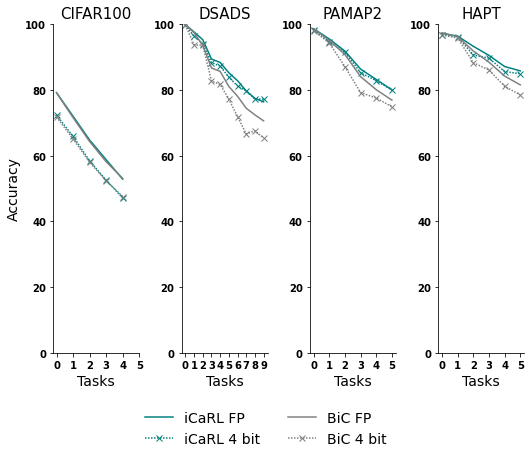

In [149]:

# with sns.axes_style('darkgrid'):
fig, axes = plt.subplots(1, 4, figsize=figsize)

colors = ["purple", "teal", "grey"]
axes[0].plot(np.arange(len(cifar_fp_icarl_nme)), cifar_fp_icarl_nme,
                label='iCaRL FP', color=colors[1], linewidth=linewidth)
axes[0].plot(np.arange(len(cifar_ours_icarl_nme)), cifar_ours_icarl_nme,
                label='iCaRL 4 bit', color=colors[1], marker='x', dashes=[1],
                linewidth=linewidth)
axes[0].plot(np.arange(len(cifar_fp_bic_nme)), cifar_fp_bic_nme,
                label='BiC FP', color=colors[2], linewidth=linewidth)
axes[0].plot(np.arange(len(cifar_ours_bic_nme)),cifar_ours_bic_nme,
                label='BiC 4 bit', color=colors[2], marker='x', dashes=[1],
                linewidth=linewidth)
axes[0].set_xlabel('Tasks', fontsize=fontsize)
axes[0].set_ylabel('Accuracy', fontsize=fontsize)
axes[0].set_title('CIFAR100', fontsize=fontsize+1)
axes[0].set_xticks((0, 1, 2, 3, 4, 5))

axes[1].plot(np.arange(len(dsads_fp_icarl_nme)), dsads_fp_icarl_nme,
                label='iCaRL FP', color=colors[1], linewidth=linewidth)
axes[1].plot(np.arange(len(dsads_ours_icarl_nme)), dsads_ours_icarl_nme,
                label='iCaRL 4 bit', color=colors[1], marker='x', dashes=[1],
                linewidth=linewidth)
axes[1].plot(np.arange(len(dsads_fp_bic_nme)), dsads_fp_bic_nme,
                label='BiC FP', color=colors[2], linewidth=linewidth)
axes[1].plot(np.arange(len(dsads_ours_bic_nme)), dsads_ours_bic_nme,
                label='BiC 4 bit', color=colors[2], marker='x', dashes=[1],
                linewidth=linewidth)
axes[1].set_xlabel('Tasks', fontsize=fontsize)
axes[1].set_title('DSADS', fontsize=fontsize+1)
axes[1].set_xticks((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

axes[2].plot(np.arange(len(pamap_ours_icarl_nme)), pamap_ours_icarl_nme,
                label='iCaRL 4 bit', color=colors[1], marker='x', dashes=[1],
                linewidth=linewidth)
axes[2].plot(np.arange(len(pamap_fp_icarl_nme)), pamap_fp_icarl_nme,
                label='iCaRL FP', color=colors[1], linewidth=linewidth)
axes[2].plot(np.arange(len(pamap_ours_bic_nme)), pamap_ours_bic_nme,
                label='BiC 4 bit', color=colors[2], marker='x', dashes=[1],
                linewidth=linewidth)
axes[2].plot(np.arange(len(pamap_fp_bic_nme)), pamap_fp_bic_nme,
                label='BiC FP', color=colors[2], linewidth=linewidth)
axes[2].set_xlabel('Tasks', fontsize=fontsize)
#axes[2].set_ylabel('Accuracy')
axes[2].set_title('PAMAP2', fontsize=fontsize+1)
# axes[2].set_xticks((0, 2, 4, 5))
axes[2].set_xticks(range(len(pamap_fp_bic_nme)))


axes[3].plot(np.arange(len(hapt_ours_icarl_nme)), hapt_ours_icarl_nme,
                label='iCaRL 4 bit', color=colors[1], marker='x', dashes=[1],
                linewidth=linewidth)
axes[3].plot(np.arange(len(hapt_fp_icarl_nme)), hapt_fp_icarl_nme,
                label='iCaRL FP', color=colors[1], linewidth=linewidth)
axes[3].plot(np.arange(len(hapt_ours_bic_nme)), hapt_ours_bic_nme,
                label='BiC 4 bit', color=colors[2], marker='x', dashes=[1],
                linewidth=linewidth)
axes[3].plot(np.arange(len(hapt_fp_bic_nme)), hapt_fp_bic_nme,
                label='BiC FP', color=colors[2], linewidth=linewidth)
axes[3].set_xlabel('Tasks', fontsize=fontsize)
#axes[3].set_ylabel('Accuracy')
axes[3].set_title('HAPT', fontsize=fontsize+1)
# axes[3].set_xticks((0, 2, 4, 5))
axes[3].set_xticks(range(len(hapt_fp_icarl_nme)))

# with sns.axes_style('whitegrid'):
    # add legen for overall fig
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.00),
            ncol=2, fontsize=fontsize,  frameon=False)


for ax in axes:
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontweight('bold')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontweight('bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    [label.set_fontweight('bold') for label in ax.get_yticklabels()]
    ax.set_ylim(ymin=0, ymax=100)


plt.tight_layout()

# save fig
fig.savefig('figures/HAR_accuracy_nme.pdf', bbox_inches='tight')

# forgetting combined

In [150]:
fig, axes = plt.subplots(1, 4, figsize=figsize)

axes[0].plot(np.arange(len(cifar_fp_lwf_cnn_forgetting)), cifar_fp_lwf_cnn_forgetting,
                label='LwF FP', color=colors[0], linewidth=linewidth)
axes[0].plot(np.arange(len(cifar_ours_lwf_forgetting)), cifar_ours_lwf_forgetting,
                label='LwF 4 bit', color=colors[0], marker='x', dashes=[1],
                linewidth=linewidth)
axes[0].plot(np.arange(len(cifar_fp_icarl_cnn_forgetting)), cifar_fp_icarl_cnn_forgetting,
                label='iCaRL FP', color=colors[1], linewidth=linewidth)
axes[0].plot(np.arange(len(cifar_ours_icarl_cnn_forgetting)), cifar_ours_icarl_cnn_forgetting,
                label='iCaRL 4 bit', color=colors[1], marker='x', dashes=[1],
                linewidth=linewidth)
axes[0].plot(np.arange(len(cifar_fp_bic_cnn_forgetting)), cifar_fp_bic_cnn_forgetting,
                label='BiC FP', color=colors[2], linewidth=linewidth)
axes[0].plot(np.arange(len(cifar_ours_bic_cnn_forgetting)),cifar_ours_bic_cnn_forgetting,
                label='BiC 4 bit', color=colors[2], marker='x', dashes=[1],
                linewidth=linewidth)
axes[0].set_xlabel('Tasks', fontsize=fontsize)
axes[0].set_ylabel('Forgetting', fontsize=fontsize)
axes[0].set_title('CIFAR100', fontsize=fontsize+1)
axes[0].set_xticks((1, 2, 3, 4, 5))

axes[1].plot(np.arange(len(dsads_fp_lwf_cnn_forgetting)), dsads_fp_lwf_cnn_forgetting,
                label='LwF FP', color=colors[0], linewidth=linewidth)
axes[1].plot(np.arange(len(dsads_ours_lwf_forgetting)), dsads_ours_lwf_forgetting,
                label='LwF 4 bit', color=colors[0], marker='x', dashes=[1],
                linewidth=linewidth)
axes[1].plot(np.arange(len(dsads_fp_icarl_cnn_forgetting)), dsads_fp_icarl_cnn_forgetting,
                label='iCaRL FP', color=colors[1], linewidth=linewidth)
axes[1].plot(np.arange(len(dsads_ours_icarl_cnn_forgetting)), dsads_ours_icarl_cnn_forgetting,
                label='iCaRL 4 bit', color=colors[1], marker='x', dashes=[1],
                linewidth=linewidth)
axes[1].plot(np.arange(len(dsads_fp_bic_cnn_forgetting)), dsads_fp_bic_cnn_forgetting,
                label='BiC FP', color=colors[2], linewidth=linewidth)
axes[1].plot(np.arange(len(dsads_ours_bic_cnn_forgetting)), dsads_ours_bic_cnn_forgetting,
                label='BiC 4 bit', color=colors[2], marker='x', dashes=[1],
                linewidth=linewidth)
axes[1].set_xlabel('Tasks', fontsize=fontsize)
axes[1].set_title('DSADS', fontsize=fontsize+1)
axes[1].set_xticks((1, 2, 3, 4, 5, 6, 7, 8, 9))
# axes[2].set_xticks(range(len(dsads_ours_bic_cnn)))

axes[2].plot(np.arange(len(pamap_ours_lwf_forgetting)), pamap_ours_lwf_forgetting,
                label='LwF 4 bit', color=colors[0], marker='x', dashes=[1],
                linewidth=linewidth)
axes[2].plot(np.arange(len(pamap_fp_lwf_cnn_forgetting)), pamap_fp_lwf_cnn_forgetting,
                label='LwF FP', color=colors[0], linewidth=linewidth)
axes[2].plot(np.arange(len(pamap_ours_icarl_cnn_forgetting)), pamap_ours_icarl_cnn_forgetting,
                label='iCaRL 4 bit', color=colors[1], marker='x', dashes=[1],
                linewidth=linewidth)
axes[2].plot(np.arange(len(pamap_fp_icarl_cnn_forgetting)), pamap_fp_icarl_cnn_forgetting,
                label='iCaRL FP', color=colors[1], linewidth=linewidth)
axes[2].plot(np.arange(len(pamap_ours_bic_cnn_forgetting)), pamap_ours_bic_cnn_forgetting,
                label='BiC 4 bit', color=colors[2], marker='x', dashes=[1],
                linewidth=linewidth)
axes[2].plot(np.arange(len(pamap_fp_bic_cnn_forgetting)), pamap_fp_bic_cnn_forgetting,
                label='BiC FP', color=colors[2], linewidth=linewidth)
axes[2].set_xlabel('Tasks', fontsize=fontsize)
#axes[2].set_ylabel('Accuracy')
axes[2].set_title('PAMAP2', fontsize=fontsize+1)
# axes[2].set_xticks((0, 2, 4, 5))
axes[2].set_xticks(range(1, len(pamap_fp_bic_cnn)+1))


axes[3].plot(np.arange(len(hapt_ours_lwf_forgetting)), hapt_ours_lwf_forgetting,
                label='LwF 4 bit', color=colors[0], marker='x', dashes=[1],
                linewidth=linewidth)
axes[3].plot(np.arange(len(hapt_fp_lwf_cnn_forgetting)), hapt_fp_lwf_cnn_forgetting,
                label='LwF FP', color=colors[0], linewidth=linewidth)
axes[3].plot(np.arange(len(hapt_ours_icarl_cnn_forgetting)), hapt_ours_icarl_cnn_forgetting,
                label='iCaRL 4 bit', color=colors[1], marker='x', dashes=[1],
                linewidth=linewidth)
axes[3].plot(np.arange(len(hapt_fp_icarl_cnn_forgetting)), hapt_fp_icarl_cnn_forgetting,
                label='iCaRL FP', color=colors[1], linewidth=linewidth)
axes[3].plot(np.arange(len(hapt_ours_bic_cnn_forgetting)), hapt_ours_bic_cnn_forgetting,
                label='BiC 4 bit', color=colors[2], marker='x', dashes=[1],
                linewidth=linewidth)
axes[3].plot(np.arange(len(hapt_fp_bic_cnn_forgetting)), hapt_fp_bic_cnn_forgetting,
                label='BiC FP', color=colors[2], linewidth=linewidth)
axes[3].set_xlabel('Tasks', fontsize=fontsize)
#axes[3].set_ylabel('Accuracy')
axes[3].set_title('HAPT', fontsize=fontsize+1)
# axes[3].set_xticks((0, 2, 4, 5))
axes[3].set_xticks(range(1,len(hapt_fp_icarl_cnn)+1)

# with sns.axes_style('whitegrid'):
    # add legen for overall fig
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.00),
            ncol=3, fontsize=fontsize,  frameon=False)


for ax in axes:
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontweight('bold')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontweight('bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    [label.set_fontweight('bold') for label in ax.get_yticklabels()]
    ax.set_ylim(ymin=0, ymax=100)


plt.tight_layout()

# save fig
fig.savefig('figures/HAR_forgetting.pdf', bbox_inches='tight')


SyntaxError: invalid syntax (<ipython-input-150-c9dd4709600f>, line 88)

# errorbars

In [ ]:
dsads_fp_lwf_cnn_std = [0.37, 6.45, 7.21, 7.93, 8.12, 8.12, 5.99, 6.15, 4.24, 4.84]
dsads_fp_icarl_cnn_std = [0.37, 22.38, 15.11, 11.28, 8.18, 6.01, 5.83, 5.62, 6.41, 6.01]
dsads_fp_bic_cnn_std = [0.94, 5.45, 7.00, 8.88, 8.16, 7.73, 7.12, 7.71, 5.95, 5.61]
dsads_ours_lwf_std = [0.41, 23.27, 17.97, 9.30, 7.57, 7.42, 7.65, 7.44, 8.15, 7.68,]
dsads_ours_icarl_cnn_std = [0.41, 6.96, 6.43, 7.62, 8.67, 8.22, 7.88, 6.66, 4.67, 4.59]
dsads_ours_bic_cnn_std = [0.19, 7.05, 7.32, 8.56, 8.19, 8.77, 8.67, 8.48, 5.09, 6.96]

pamap_fp_lwf_cnn_std = [1.21, 16.77, 13.11, 11.73, 8.96, 8.03]
pamap_fp_icarl_cnn_std = [1.21, 6.50, 7.80, 4.98, 7.61, 5.50]
pamap_fp_bic_cnn_std = [1.45, 3.79, 6.30, 7.75, 6.56, 6.10]
pamap_ours_lwf_std = [0.99, 15.95, 16.09, 14.27, 11.34, 10.25]
pamap_ours_icarl_cnn_std = [0.99, 5.89, 7.31, 5.90, 6.46, 5.02]
pamap_ours_bic_cnn_std = [1.19, 5.21, 6.98, 7.10, 5.89, 6.66]

hapt_fp_lwf_cnn_std = [7.64, 20.30, 16.06, 9.35, 9.16, 8.74]
hapt_fp_icarl_cnn_std = [7.64, 5.62, 6.35, 4.08, 5.94, 5.12]
hapt_fp_bic_cnn_std = [7.37, 4.62, 5.73, 6.13, 5.53, 4.32]
hapt_ours_lwf_std = [8.89, 18.84, 16.41, 14.89, 10.37, 10.22]
hapt_ours_icarl_cnn_std = [8.89, 5.70, 9.61, 4.98, 5.61, 4.51]
hapt_ours_bic_cnn_std = [11.53, 5.16, 6.58, 4.61, 5.33, 3.93]


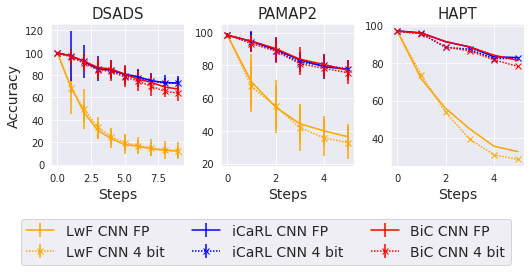

In [ ]:
with sns.axes_style('darkgrid'):
    fig, axes = plt.subplots(1, 3, figsize=figsize)
    axes[0].errorbar(np.arange(len(dsads_fp_lwf_cnn)), dsads_fp_lwf_cnn,
                     yerr=dsads_fp_lwf_cnn_std, label='LwF CNN FP',
                     color="orange", linewidth=linewidth)
    axes[0].errorbar(np.arange(len(dsads_ours_lwf)), dsads_ours_lwf,
                        yerr=dsads_ours_lwf_std, label='LwF CNN 4 bit',
                        color="orange", marker='x', dashes=[1], linewidth=linewidth)
    axes[0].errorbar(np.arange(len(dsads_fp_icarl_cnn)), dsads_fp_icarl_cnn,
                        yerr=dsads_fp_icarl_cnn_std, label='iCaRL CNN FP',
                        color="blue", linewidth=linewidth)
    axes[0].errorbar(np.arange(len(dsads_ours_icarl_cnn)), dsads_ours_icarl_cnn,
                        yerr=dsads_ours_icarl_cnn_std, label='iCaRL CNN 4 bit',
                        color="blue", marker='x', dashes=[1], linewidth=linewidth)
    axes[0].errorbar(np.arange(len(dsads_fp_bic_cnn)), dsads_fp_bic_cnn,
                        yerr=dsads_fp_bic_cnn_std, label='BiC CNN FP',
                        color="red", linewidth=linewidth)
    axes[0].errorbar(np.arange(len(dsads_ours_bic_cnn)), dsads_ours_bic_cnn,
                        yerr=dsads_ours_bic_cnn_std, label='BiC CNN 4 bit',
                        color="red",  marker='x', dashes=[1], linewidth=linewidth)
    axes[0].set_xlabel('Steps', fontsize=fontsize)
    axes[0].set_ylabel('Accuracy', fontsize=fontsize)
    axes[0].set_title('DSADS', fontsize=fontsize+1)

    axes[1].errorbar(np.arange(len(pamap_ours_lwf)), pamap_ours_lwf,
                        yerr=pamap_ours_lwf_std, label='LwF CNN 4 bit',
                        marker='x', dashes=[1],
                        color="orange", linewidth=linewidth)
    axes[1].errorbar(np.arange(len(pamap_fp_lwf_cnn)), pamap_fp_lwf_cnn,
                        yerr=pamap_fp_lwf_cnn_std, label='LwF CNN FP',
                        color="orange",linewidth=linewidth)
    axes[1].errorbar(np.arange(len(pamap_ours_icarl_cnn)), pamap_ours_icarl_cnn,
                        yerr=pamap_ours_icarl_cnn_std, label='iCaRL CNN 4 bit',
                        marker='x', dashes=[1], 
                        color="blue", linewidth=linewidth)
    axes[1].errorbar(np.arange(len(pamap_fp_icarl_cnn)), pamap_fp_icarl_cnn,
                        yerr=pamap_fp_icarl_cnn_std, label='iCaRL CNN FP',
                        color="blue", linewidth=linewidth)
    axes[1].errorbar(np.arange(len(pamap_ours_bic_cnn)), pamap_ours_bic_cnn,
                        yerr=pamap_ours_bic_cnn_std, label='BiC CNN 4 bit',
                        marker='x', dashes=[1],
                        color="red",linewidth=linewidth)
    axes[1].errorbar(np.arange(len(pamap_fp_bic_cnn)), pamap_fp_bic_cnn,
                        yerr=pamap_fp_bic_cnn_std, label='BiC CNN FP',
                        color="red", linewidth=linewidth)
    axes[1].set_xlabel('Steps', fontsize=fontsize)
    #axes[1].set_ylabel('Accuracy')
    axes[1].set_title('PAMAP2', fontsize=fontsize+1)

    axes[2].errorbar(np.arange(len(hapt_ours_lwf)), hapt_ours_lwf,
                        label='LwF CNN 4 bit', color="orange", marker='x', dashes=[1],
                        linewidth=linewidth)
    axes[2].errorbar(np.arange(len(hapt_fp_lwf_cnn)), hapt_fp_lwf_cnn,
                        label='LwF CNN FP', color="orange", linewidth=linewidth)
    axes[2].errorbar(np.arange(len(hapt_ours_icarl_cnn)), hapt_ours_icarl_cnn,
                        label='iCaRL CNN 4 bit', color="blue", marker='x', dashes=[1],
                        linewidth=linewidth)
    axes[2].errorbar(np.arange(len(hapt_fp_icarl_cnn)), hapt_fp_icarl_cnn,
                        label='iCaRL CNN FP', color="blue", linewidth=linewidth)
    axes[2].errorbar(np.arange(len(hapt_ours_bic_cnn)), hapt_ours_bic_cnn,
                        label='BiC CNN 4 bit', color="red", marker='x', dashes=[1],
                        linewidth=linewidth)
    axes[2].errorbar(np.arange(len(hapt_fp_bic_cnn)), hapt_fp_bic_cnn,
                        label='BiC CNN FP', color="red", linewidth=linewidth)
    axes[2].set_xlabel('Steps', fontsize=fontsize)
    #axes[2].set_ylabel('Accuracy')
    axes[2].set_title('HAPT', fontsize=fontsize+1)

    # add legen for overall fig
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.00),
               ncol=3, fontsize=fontsize)
    plt.tight_layout()

## dsads

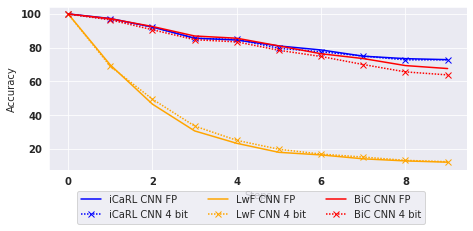

In [ ]:

with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots( figsize=figsize)
    ax.plot(np.arange(len(dsads_fp_icarl_cnn)), dsads_fp_icarl_cnn,
            label='iCaRL CNN FP', color="blue")
    ax.plot(np.arange(len(dsads_ours_icarl_cnn)), dsads_ours_icarl_cnn,
            label='iCaRL CNN 4 bit', color="blue", marker='x', dashes=[1])
    ax.plot(np.arange(len(dsads_fp_lwf_cnn)), dsads_fp_lwf_cnn,
            label='LwF CNN FP', color="orange")
    ax.plot(np.arange(len(dsads_ours_lwf)), dsads_ours_lwf,
            label='LwF CNN 4 bit', color="orange", marker='x', dashes=[1])
    ax.plot(np.arange(len(dsads_fp_bic_cnn)), dsads_fp_bic_cnn,
            label='BiC CNN FP', color="red")
    ax.plot(np.arange(len(dsads_ours_bic_cnn)), dsads_ours_bic_cnn,
            label='BiC CNN 4 bit', color="red", marker='x', dashes=[1])
    ax.set_xlabel('Steps',)
    ax.set_ylabel('Accuracy')
    
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=3)

    
    for tick in ax.xaxis.get_major_ticks():
      tick.label1.set_fontweight('bold')
    for tick in ax.yaxis.get_major_ticks():
      tick.label1.set_fontweight('bold')

## pamap

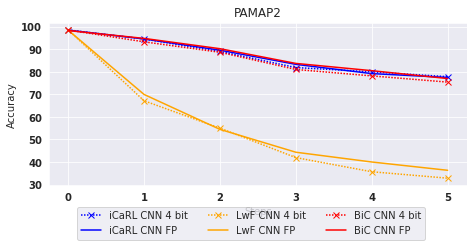

In [ ]:
with sns.axes_style('darkgrid'):
        fig, ax = plt.subplots( figsize=figsize)
        
        ax.plot(np.arange(len(pamap_ours_icarl_cnn)), pamap_ours_icarl_cnn,
                label='iCaRL CNN 4 bit', color="blue", marker='x', dashes=[1])
        ax.plot(np.arange(len(pamap_fp_icarl_cnn)), pamap_fp_icarl_cnn,
                label='iCaRL CNN FP', color="blue")
        ax.plot(np.arange(len(pamap_ours_lwf)), pamap_ours_lwf,
                label='LwF CNN 4 bit', color="orange", marker='x', dashes=[1])
        ax.plot(np.arange(len(pamap_fp_lwf_cnn)), pamap_fp_lwf_cnn,
                label='LwF CNN FP', color="orange")
        ax.plot(np.arange(len(pamap_ours_bic_cnn)), pamap_ours_bic_cnn,
                label='BiC CNN 4 bit', color="red", marker='x', dashes=[1])
        ax.plot(np.arange(len(pamap_fp_bic_cnn)), pamap_fp_bic_cnn,
                label='BiC CNN FP', color="red")
        ax.set_xlabel('Steps')
        ax.set_ylabel('Accuracy')
        ax.set_title('PAMAP2')
        fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=3)

        for tick in ax.xaxis.get_major_ticks():
                tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
                tick.label1.set_fontweight('bold')

## hapt

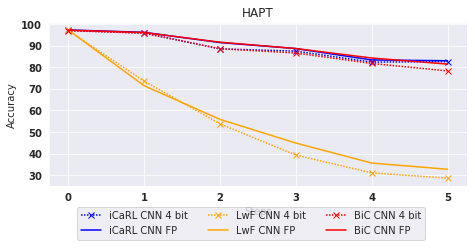

In [ ]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots( figsize=figsize)
    ax.plot(np.arange(len(hapt_ours_icarl_cnn)), hapt_ours_icarl_cnn,
            label='iCaRL CNN 4 bit', color="blue", marker='x', dashes=[1])
    ax.plot(np.arange(len(hapt_fp_icarl_cnn)), hapt_fp_icarl_cnn,
            label='iCaRL CNN FP', color="blue")
    ax.plot(np.arange(len(hapt_ours_lwf)), hapt_ours_lwf,
            label='LwF CNN 4 bit', color="orange", marker='x', dashes=[1])
    ax.plot(np.arange(len(hapt_fp_lwf_cnn)), hapt_fp_lwf_cnn,
            label='LwF CNN FP', color="orange")
    ax.plot(np.arange(len(hapt_ours_bic_cnn)), hapt_ours_bic_cnn,
            label='BiC CNN 4 bit', color="red", marker='x', dashes=[1])
    ax.plot(np.arange(len(hapt_fp_bic_cnn)), hapt_fp_bic_cnn,
            label='BiC CNN FP', color="red")
    ax.set_xlabel('Steps')
    ax.set_ylabel('Accuracy')
    ax.set_title('HAPT')
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=3)

    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontweight('bold')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontweight('bold')
    